In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon= pd.read_csv('pokemon_data.csv')
print (pokemon.shape)
pokemon.head(10)

(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


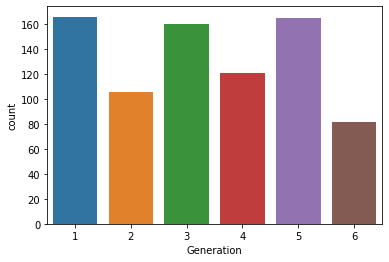

In [3]:
#plotting count by generation category

sb.countplot(data =pokemon, x='Generation');

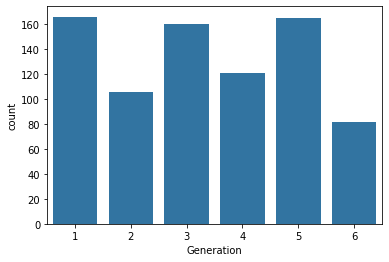

In [4]:
#store base_color as 0;
##calling it without any parameters returns current/default pallete. we want this to all be one & the same color

base_color =sb.color_palette()[0]
sb.countplot(data =pokemon, x='Generation', color=base_color);

In [5]:
#sort generations in order programmatically, and store in gen_order
gen_order = pokemon['Generation'].value_counts().index

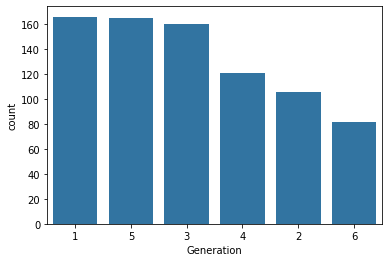

In [6]:
#plot with this order now
base_color =sb.color_palette()[0]
sb.countplot(data =pokemon, x='Generation', color=base_color,
            order = gen_order);

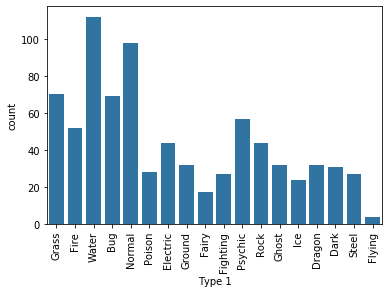

In [7]:
#now we can visualize count by pokemon type
base_color =sb.color_palette()[0]
sb.countplot(data =pokemon, x='Type 1', color=base_color);

#we are going to rotate the name labels on the x axis by 90 degrees since
##since there are more columns and the names will run over each other
plt.xticks(rotation = 90);

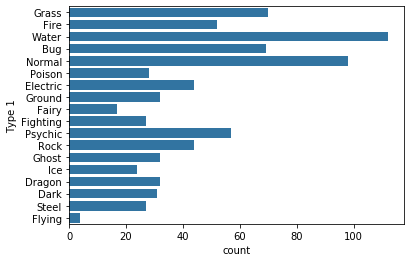

In [8]:
#we can also just make a HORIZONTAL bar chart
##we just change x to y
##the labels are now on the vertical axis

base_color =sb.color_palette()[0]
sb.countplot(data =pokemon, y='Type 1', color=base_color);

In [9]:
type_order =pokemon['Type 1'].value_counts().index

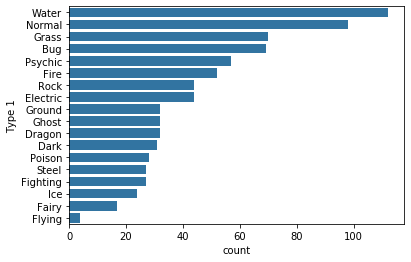

In [10]:
#run the chart with the order in place
base_color =sb.color_palette()[0]
sb.countplot(data =pokemon, y='Type 1', color=base_color, order=type_order);

In [ ]:
##end of bar charts section

In [ ]:
##absolute versus relative frequency section

In [19]:
#data wrangling- melt function to combine the Type 1 and Type 2 columns together

pkmn_types= pokemon.melt(id_vars= ['#', 'Name'],
    value_vars= ['Type 1', 'Type 2'],
    var_name='type_level', value_name ='type').dropna()
pkmn_types.tail()

,#,Name,type_level,type
1595,719,Diancie,Type 2,Fairy
1596,719,DiancieMega Diancie,Type 2,Fairy
1597,720,HoopaHoopa Confined,Type 2,Ghost
1598,720,HoopaHoopa Unbound,Type 2,Dark
1599,721,Volcanion,Type 2,Water


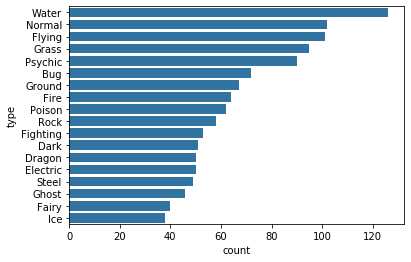

In [20]:
#create variables to get types in order of frequency and then plot in bar chart

#order by frequency
type_counts= pkmn_types['type'].value_counts()
type_order= type_counts.index
#color set as default aka blue
base_color = sb.color_palette()[0]

#plot
sb.countplot(data= pkmn_types, y ='type', color=base_color, order=type_order);

In [22]:
##ABSOLUTE TO RELATIVE COUNTS

#creating a list of tick positions
##compute the length of the longest bar in terms of proportion

#total number of pokemons
n_pokemon = pokemon.shape[0]
#the max type count
max_type_count = type_counts[0]
#proportion by dividing the last two variables
max_prop = max_type_count/n_pokemon
#print
print(max_prop)

0.1575


In [26]:
#create tick_props variable 
##use arange function to create evenly spaced out tick marks from 0 to max value (found above)

tick_props = np.arange(0, max_prop, 0.02)
#list comprehension to create tick_names variable
##these strings will show proportion with consistent 2 decimal places
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

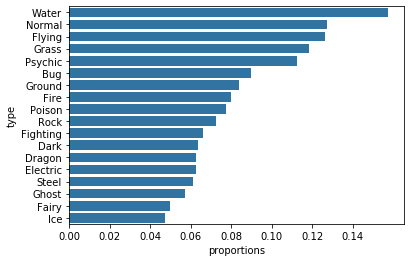

In [27]:
#modify plot
sb.countplot(data= pkmn_types, y ='type', color=base_color, order=type_order);

#sets tick positions. we need to multiply tick_props with number of pokemons to get positions correct
##second argument sets tick labels
plt.xticks(tick_props * n_pokemon, tick_names)
#change label from counts to more appropriate name- proportions
plt.xlabel('proportions');

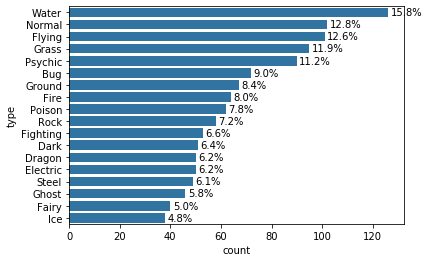

In [28]:
##ALTERNATIVELY, we might want the x axis to stay as COUNTS
##and add labels to note PROPORTIONS
sb.countplot(data= pkmn_types, y ='type', color=base_color, order=type_order);

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    pct_string= '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')
    #1st argument is the x position, just after the end of the bar
    ##2nd argument is the y position, which starts at zero and increments with the loop
    ###3rd argument is the string to be printed- the proportion perentage. ID this variable as 'pct_string'
    #finally, add optional argument, va, to center the vertical alignment of text on each bar